<a href="https://colab.research.google.com/github/srujan-b/computervision/blob/main/qrcode-Detector/qrcodeDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we aim to develop a QR Code Detector and Decoder utilizing the OpenCV library from the ground up. Our objective is to create a comprehensive solution for detecting and decoding QR codes. Following the implementation, we will apply our QR Code Detector to analyze a sample image provided below.

**Here are the key steps to be undertaken in this project:**


**Image Loading:**

Import the target image for analysis.
QR Code Detection:

Utilize OpenCV to identify QR codes within the loaded image.

**Bounding Box Visualization:**

Implement a mechanism to draw a bounding box around the identified QR code for clear visualization.

**Decoding Text:**

Employ decoding algorithms to extract text information from the detected QR code.

**Output Presentation:**

Print the decoded text for reference and further analysis.

**Result Image Handling:**

Save the processed image with the bounding box to provide a visual representation of the detected QR code.

**Display:**

Showcase the result image to facilitate examination and validation of the QR code detection and decoding process.

In [ ]:
!git clone https://github.com/srujan-b/computervision.git

fatal: destination path 'computervision' already exists and is not an empty directory.


In [26]:
%matplotlib inline

# Import modules
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

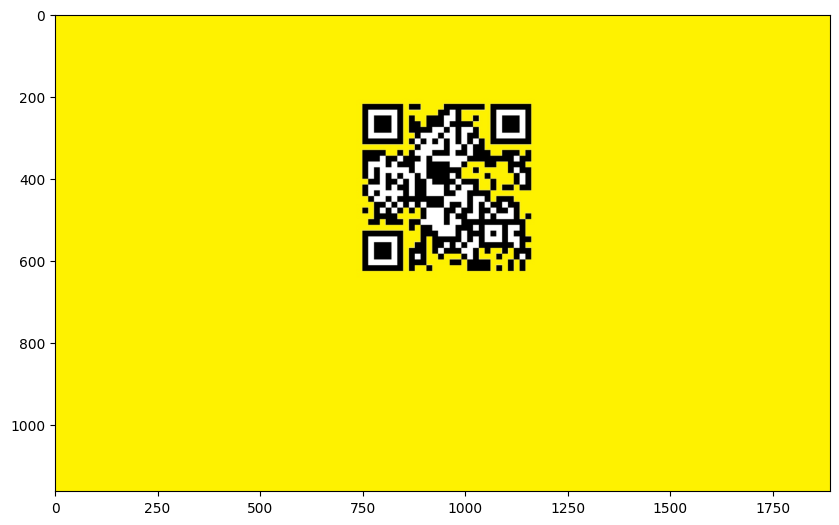

In [27]:
qrCode = cv2.imread("/content/computervision/qrcode-Detector/Qr code Detector.jpg")

qrCodeImage = qrCode.copy()
qrImage = qrCode.copy()
plt.imshow(qrCodeImage[:,:,::-1])

In [28]:
qrDecoder = cv2.QRCodeDetector()
decodedMessage, boundingBox, _ = qrDecoder.detectAndDecode(qrImage)

if decodedMessage != None:
    print("QR Code Detected")
else:
    print("QR Code NOT Detected")

QR Code Detected


In [14]:
print(boundingBox)

[[[ 749.       219.00002]
  [1160.       219.00002]
  [1160.       625.     ]
  [ 749.       625.     ]]]


In [31]:
# Get the number of points in the bounding box
n = len(boundingBox)

# Draw lines connecting consecutive points in the bounding box
for i in range(0, n):
    # Determine the index of the next point, considering wrapping around
    nextIndex = (i + 1) % n
    pt1 = tuple(map(int, boundingBox[i][0][:-1]))
    pt2 = tuple(map(int, boundingBox[nextIndex][0][:-1]))

    # Draw a line between current and next points
    cv2.line(qrImage, pt1, pt2, (255, 0, 0), thickness=3, lineType=cv2.LINE_AA)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Expected sequence length 2, got 1
>  - Can't parse 'pt1'. Expected sequence length 2, got 1


In [24]:
cv2.putText(qrImage, decodedMessage, (700, 300), cv2.FONT_HERSHEY_SIMPLEX, 2, (250, 0, 0), 3, cv2.LINE_AA);

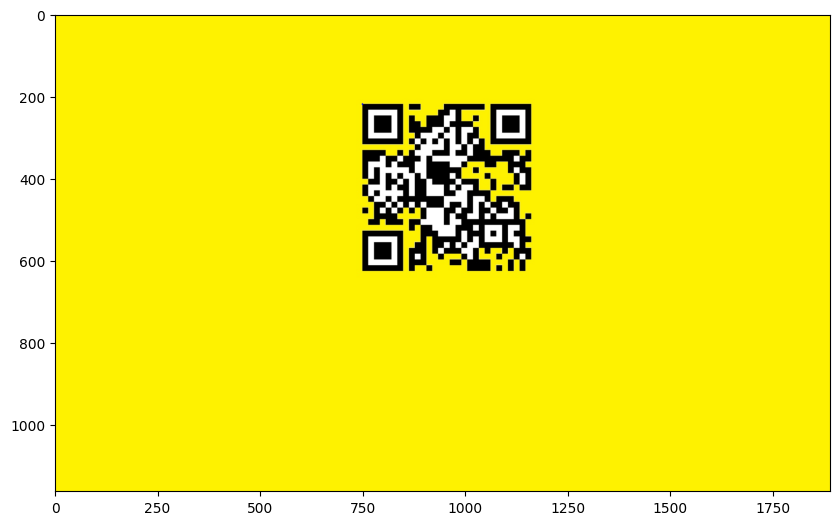

In [30]:
plt.imshow(qrImage[:,:,::-1])